In [1]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
from qiskit import IBMQ
import matplotlib
%matplotlib inline

In [2]:
qiskit.__version__


NameError: name 'qiskit' is not defined

In [3]:


token = "38982bb48cc7cc47dc1ed86a5730f1f19534098ec1813dfa9586a825bd6124a10c6ec8a2d59fb18bc275effa766315e7ec858ecfce18633af5fbbdd136dccb51"
#IBMQ.save_account(token)


In [2]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
from qiskit import *

In [9]:
qr = QuantumRegister(2) # build two quibit quantum registers 
cr = ClassicalRegister(2) # take two classical bits to take measurements from the quantum bits

In [10]:
circuit = QuantumCircuit(qr,cr) # build a quantum circuit

In [9]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [11]:
# build gate. To apply entanglement, we have to provide a hadamard gate
circuit.h(qr[0])


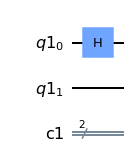

In [12]:
circuit.draw(output="mpl")

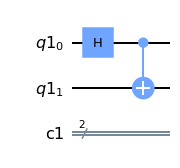

In [13]:
# two qubit logical operation: controlled X
circuit.cx(qr[0],qr[1])      #logic: if this than that ; control: 1st qubit ; target: 2nd qubit
circuit.draw(output="mpl")

In [14]:
""" the circuit is now composed of a hadamard gate and a control gate, now with these two simple operation
    we can now create entanglement between q0_0 and q_1 . 
    Now we measure these quantum bits and store them in the classical bits"""

circuit.measure(qr,cr)


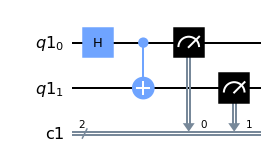

In [15]:
circuit.draw(output="mpl")

In [16]:
""" we now verify the circuit via simulation. Aer """
simulator = Aer.get_backend("qasm_simulator") #get simulator

In [17]:
#execute the circuit using the simulator at the backend
result = execute(circuit,backend=simulator).result()


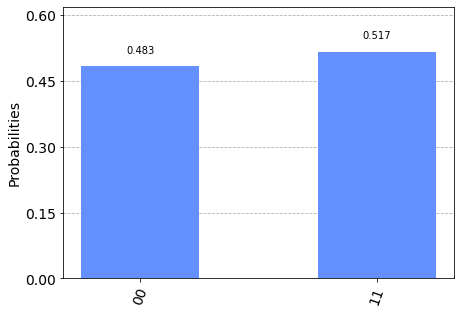

In [18]:
plot_histogram(result.get_counts(circuit))

In [35]:
available_cloud_backends = provider.backends() 
print('\nHere is the list of cloud backends that are available to you:')
for i in available_cloud_backends: print(i)

available_local_backends = Aer.backends() 
print('\nHere is the list of local backends that are available to you: ')
for i in available_local_backends: print(i)


Here is the list of cloud backends that are available to you:
ibmq_qasm_simulator
ibmq_armonk
ibmq_santiago
ibmq_bogota
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila

Here is the list of local backends that are available to you: 
aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [48]:
#load ibmq account . execute into real quantum circuit
provider= IBMQ.get_provider("ibm-q")
qcomp = provider.get_backend('ibmq_qasm_simulator')
job = execute(circuit, backend = qcomp)



In [49]:
job_monitor(job)

Job Status: job has successfully run


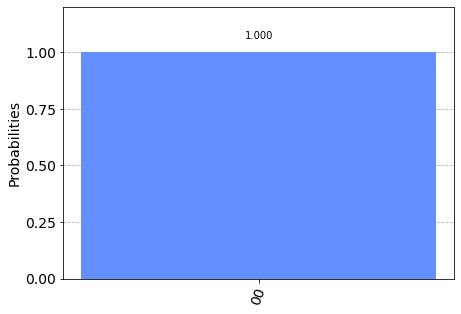

In [50]:
job_result = job.result()
plot_histogram(job_result.get_counts(circuit))

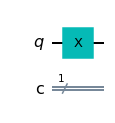

In [9]:
circuit = QuantumCircuit(1,1)
circuit.x(0)

simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()

circuit.draw(output="mpl")

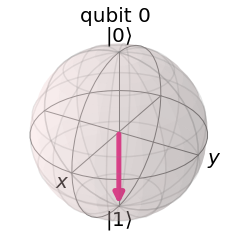

In [7]:
# multivector representation
plot_bloch_multivector(statevector)

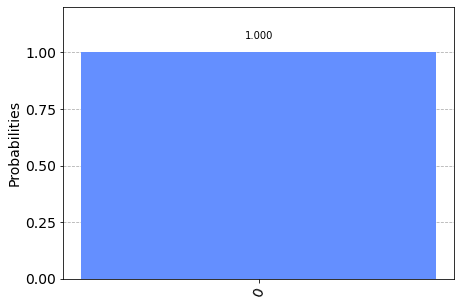

In [10]:
# measurement of qubit, count representation
circuit.measure([0],[0])
backend = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend = backend, shots = 1024).result()
counts = result.get_counts()

plot_histogram(counts)

In [11]:
# matrix representation of a qubit
circuit = QuantumCircuit(1,1)
circuit.x(0)

backend = Aer.get_backend("unitary_simulator")
result = execute(circuit, backend = backend).result()
unitary = result.get_unitary()
print(unitary)


Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


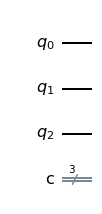

In [24]:
circuit = QuantumCircuit(3,3)    # 3 qubits, 3 classical bits
circuit.draw(output="mpl")

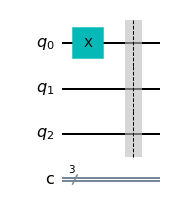

In [25]:
# task: teleport state q1 to q3

circuit.x(0)  #apply x gate to q0 X|0> = |1> 

circuit.barrier()
circuit.draw(output="mpl")

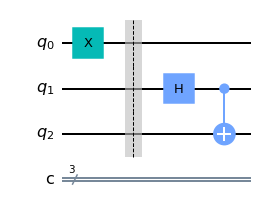

In [26]:
#1: create entanglement between q2 and q3 
circuit.h(1) # hadamard q2
circuit.cx(1,2) # controlled x gate: ctl:q2 -> tg:q3
circuit.draw(output="mpl")

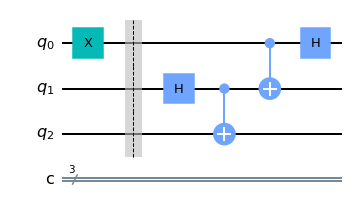

In [27]:
#2: Take bell measurement between q1 and q2
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output="mpl")

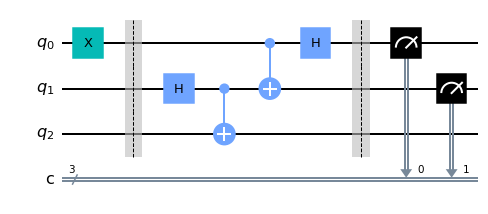

In [28]:
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw(output="mpl")

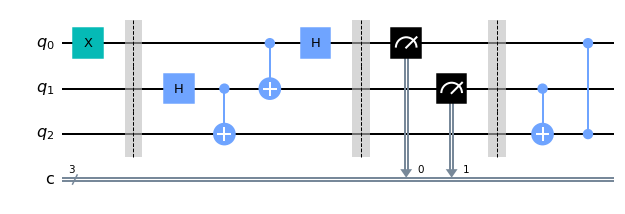

In [29]:
circuit.barrier()
circuit.cx(1,2)  #controlled x
circuit.cz(0,2)  #controlled z
circuit.draw(output="mpl")

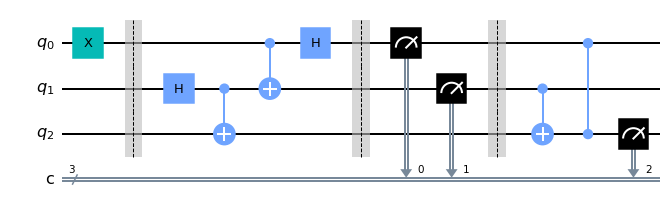

In [33]:
#circuit.measure(2,2) # measure q2 , save to c2
circuit.draw(output="mpl")

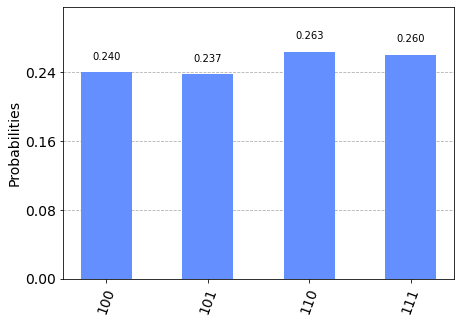

In [32]:

simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend= simulator, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)